'''
    Graded Challenge 5

    Nama  : Kamelia Ramandha
    Batch : CODA-RMT-010

    Program ini dibuat untuk melakukan analisa sederhana menggunakan statistik deskriptif dan inferensial guna melihat peluang bisnis untuk dropship seblak dari tokopedia.

'''

# Case
Kamu ingin menambah pendapatanmu dengan berjualan. Namun, kamu tidak punya cukup modal untuk produksi barang dan hanya cukup untuk promosi, sehingga kamu memutuskan untuk menjalanan skema dropship di platform Tokopedia.

Kamu masih bingung akan berjualan apa dan teringat bahwa saat ini sedang viral seblak. Namun, kamu tidak yakin apakah benar bahwa masyarakat memiliki animo yang besar terhadap seblak.

Karena kamu lulusan bootcamp Data Analytics Hacktiv8, dengan kemampuan dan pengetahuan kamu, kamu ingin menganalisis bagaimana penjualan produk seblak di Tokopedia. Apakah orang suka, apakah banyak yang beli, dsb.

**Konteks Bisnis**

Samuel, seorang pelajar berusia 21 tahun, ingin memanfaatkan waktunya sebelum mendapatkan pekerjaan tetap dengan mencoba berbisnis. Setelah melakukan riset di TikTok, ia menemukan tren makanan instan berupa seblak yang sering direview dan mendapat banyak perhatian. Samuel kemudian tertarik untuk menjadi dropshipper seblak di marketplace Tokopedia.

Namun, ia menghadapi permasalahan karena harga seblak di Tokopedia sangat bervariasi, bahkan ada yang mencapai jutaan rupiah, sehingga sulit menentukan harga jual yang optimal. Samuel juga ingin tahu apakah lokasi penjual memengaruhi harga, serta apakah harga berkorelasi dengan jumlah pembelian. Untuk itu, ia meminta bantuan Hasan, seorang teman dengan latar belakang Data Analytics, agar dapat melakukan analisis menyeluruh terhadap penjualan seblak di Tokopedia.


**Problem Statement (SMART Framework)**

Specific: Samuel ingin menentukan produk seblak yang paling potensial dijual dengan harga optimal agar kompetitif di pasar.

Measurable: Keberhasilan diukur dari pencapaian minimal 50 transaksi per bulan.

Achievable: Berdasarkan analisis data, target ini realistis karena harga di kisaran tersebut sesuai dengan pasar dan tidak dipengaruhi lokasi penjual.

Relevant: Tren konsumsi makanan instan di e-commerce terus meningkat, sehingga penetapan harga kompetitif dapat meningkatkan peluang penjualan.

Time-bound: Analisis harus selesai dalam 1 bulan pertama, agar strategi penjualan bisa dijalankan selama 6 bulan ke depan.


**Problem Statement (Ringkasan dalam 1 Kalimat)**

Samuel perlu menentukan produk seblak dengan harga optimal dan target penjualan minimal 50 transaksi per bulan dalam waktu 1 bulan, agar strategi dropshipping yang dijalankan selama 6 bulan ke depan dapat menghasilkan keuntungan optimal.

In [ ]:
!pip install matplotlib seaborn


In [27]:
# Membuka modul yang diperlukan
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML


In [3]:
# Membuka file yang sudah dibuat untuk GC3
df = pd.read_csv('tokopedia_seblak_clean.csv')


In [ ]:
# Melihat 5 data teratas
df.head()

,nama_produk,harga_bersih,penjual,kota_penjual,rating,jumlah_terjual
0,TGM MERCH - Bantal Boneka Unik Motif Seblak,30000,Tgm Merch,Bekasi,4.8,50.0
1,Bumbu Tabur Premium Bubuk Tabur Keripik Tahu K...,8250,Mamacia Treats,Surabaya,5.0,100.0
2,(250 gram) Bumbu Tabur Premium Bubuk Tabur Ker...,58900,Mamacia Treats,Surabaya,5.0,15.0
3,INDOMIE MIE KUAH INSTANT RASA SEBLAK HOT JELET...,3500,Hypermart Depok,Depok,5.0,100.0
4,CAP IBU Bumbu Seblak Bandung - Bumbu Masak Ins...,38000,Cap Ibu Shop,Jakarta Timur,5.0,100.0


In [5]:
# Melihat profil data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_produk     155 non-null    object 
 1   harga_bersih    155 non-null    int64  
 2   penjual         155 non-null    object 
 3   kota_penjual    155 non-null    object 
 4   rating          146 non-null    float64
 5   jumlah_terjual  147 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.4+ KB


In [7]:
# Melihat data yang duplikat
df.duplicated().sum()


np.int64(0)

In [8]:
# Melihat data yang null    
df.isnull().sum()

nama_produk       0
harga_bersih      0
penjual           0
kota_penjual      0
rating            9
jumlah_terjual    8
dtype: int64

In [9]:
# Menghapus data yang null
df = df.dropna()

In [10]:
# Melihat profil data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 154
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_produk     146 non-null    object 
 1   harga_bersih    146 non-null    int64  
 2   penjual         146 non-null    object 
 3   kota_penjual    146 non-null    object 
 4   rating          146 non-null    float64
 5   jumlah_terjual  146 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.0+ KB


## Analisa Data Harga

In [20]:
# Melihat data Median, Mean, dan Modus untuk Harga
print('Average Price:',"Rp.",df['harga_bersih'].mean().round(2))
print('Median Price:',"Rp.",df['harga_bersih'].median())
print('Mode Price:',"Rp.",df['harga_bersih'].mode().values[0])
print("Min Price:","Rp.",df['harga_bersih'].min())
print("Max Price:","Rp.",df['harga_bersih'].max())

Average Price: Rp. 79872.29
Median Price: Rp. 22250.0
Mode Price: Rp. 25000
Min Price: Rp. 345
Max Price: Rp. 5000000


In [19]:
# Melihat jarakan harga menggunakan standard deviasi
std = df['harga_bersih'].std()
print('Standard Deviation of Price:',std)

Standard Deviation of Price: 423058.8618312924


In [ ]:
Dari hasil diatas, dapat disimpulkan bahwa:
- Rata-rata harga seblak di Tokopedia adalah Rp.79.872,
- Median harga seblak di Tokopedia adalah Rp.22.250,
- Modus harga seblak di Tokopedia adalah Rp.25.000,
- Harga seblak termurah di Tokopedia adalah Rp.345,
- Harga seblak termahal di Tokopedia adalah Rp.5.000.000,
- Jarak harga seblak di Tokopedia berdasarkan standard deviasi adalah Rp.423058 --> Hal ini menunjukkan bahwa harga seblak di Tokopedia sangat bervariasi dan kemungkinan memiliki outlier yang cukup tinggi.

In [ ]:
Setelah dilihat, standar deviasi harga cukup tinggi yaitu pada Rp.423.058 dan harga terendah dengan tertinggi memiliki jarak yang besar. Hal ini mengindikasi adanya outlier yang besar.

Untuk memvisualisasikan outlier, dapat digunakan boxplot sebagai berikut:

In [ ]:
# Menghitung Q1, Q2, Q3, dan IQR untuk visualisasi boxplot
q1 = df['harga_bersih'].quantile(0.25)
q2 = df['harga_bersih'].quantile(0.5)
q3 = df['harga_bersih'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

Q1: 12729.25
Q2: 22250.0
Q3: 35000.0
Interquartile Range (IQR): 22270.75


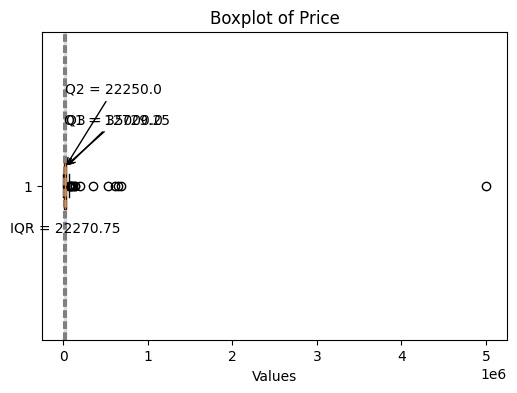

In [67]:
# Visualisasi boxplot menggunakan semua data

plt.figure(figsize=(6, 4))
plt.boxplot(df['harga_bersih'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Price')

plt.show()

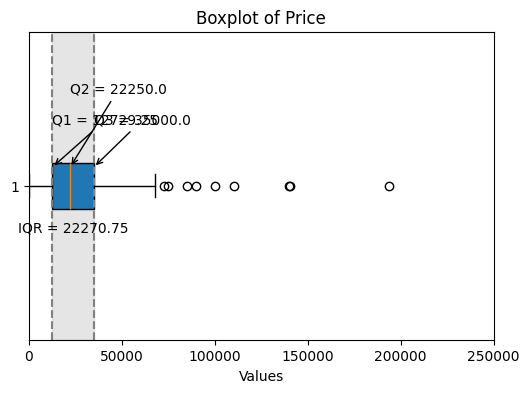

In [ ]:
# Visualisasi boxplot dengan limitasi axis x untuk visualisasi yang lebih baik
plt.figure(figsize=(6, 4))
plt.boxplot(df['harga_bersih'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.xlim(0, 250000) # Melimit axis x for better visualization
plt.title('Boxplot of Price')

plt.show()

In [ ]:
Setelah dilihat menggunakan boxplot, makin terlihat bahwa outlier pada harga seblak terletak di bagian kanan boxplot (harga yang sangat tinggi dibandingkan dengan median).

Dengan itu, untuk menghindari outlier, maka kita dapat menggunakan median sebagai ukuran pemusatan data pada harga seblak di Tokopedia, yaitu Rp.22.250.

In [ ]:
Lalu, kita juga bisa melihat penyebaran data harga seblak di Tokopedia sebagai berikut:

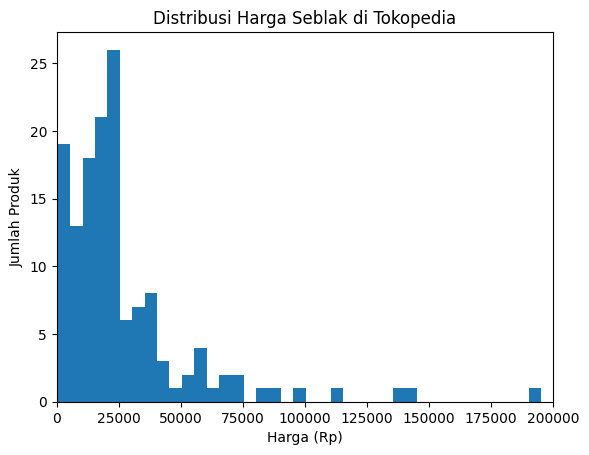

In [ ]:
# Visualisasi persebaran data menggunakan histogram
df['harga_bersih'].plot(
    kind='hist',
    bins=1000, # Menggunakan bins yang lebih banyak untuk melihat distribusi data dengan lebih detail
)

plt.xlabel("Harga (Rp)")
plt.ylabel("Jumlah Produk")
plt.title("Distribusi Harga Seblak di Tokopedia")

plt.xlim(0, 200000)  # excluding outliers dengan membatasi harga di Rp 200.000
plt.show()


In [54]:
# Melihat normalitas data menggunakan D'Agostino's K^2 Test
res = stats.normaltest(df['harga_bersih'])

print(f'p-value: {res.pvalue}') 
print(f"Skewness: {df['harga_bersih'].skew()}")
print(f"Kurtosis: {df['harga_bersih'].kurtosis()}")


p-value: 1.1293559362916386e-66
Skewness: 11.057824803481415
Kurtosis: 128.5133529056007


Setelah ditelaah lebih lanjut. Distribusi harga seblak sangat tidak normal, ditandai oleh:

1. p-value yang hampir 0 (tolak normalitas) karena angkanya telah mencapai > 0.05
2. skewness positif besar (long right tail, karena ada harga Rp 5.000.000) karena skewness > 1 dan positif
3. kurtosis super tinggi dengan kategori Leptokurtic (outlier sangat parah) karena kurtosis > 3

In [ ]:
Lalu, kita bisa membuat data normalitas data harga seblak di Tokopedia sebagai berikut menggunakan Tukey's Rule:

In [ ]:
# Menentukan batas atas dan bawah menggunakan Tukey's Rule
q1 = df['harga_bersih'].quantile(0.25)
q3 = df['harga_bersih'].quantile(0.75)
iqr = q3-q1

lower_bound = max(0, q1 - 1.5*iqr) # lower bound dibuat tidak kurang dari 0 karena harga tidak mungkin negatif
upper_bound = q3 + 1.5*iqr

print(f"Upper Bound: {upper_bound:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")


Upper Bound: 68406.12
Lower Bound: 0.00


In [ ]:
# Mencari persentase outlier

outlier = df['harga_bersih'][(df['harga_bersih']<low_bound) | (df['harga_bersih']>up_bound)]
no_outlier = df['harga_bersih'][(df['harga_bersih']>=low_bound) & (df['harga_bersih']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df['harga_bersih']):.2f}%%')

Percentage of outliers: 10.27%%


<Axes: >

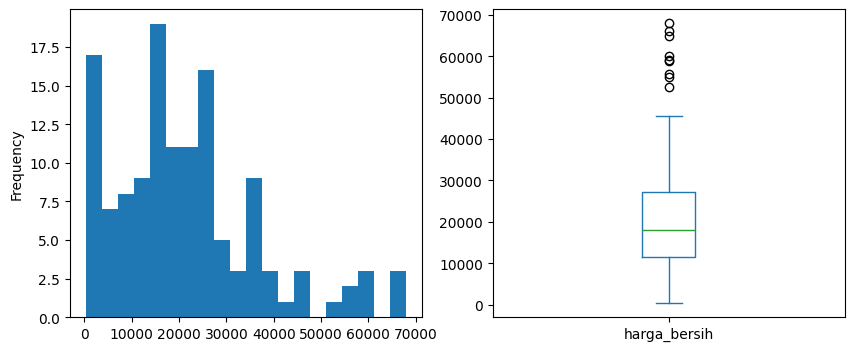

In [ ]:
# Membuat visualisasi data normalitas menggunakan histogram dan boxplot
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

In [66]:
# Melihat data Median, Mean, dan Modus untuk Harga
print('Average Price:',"Rp.",no_outlier.mean().round(2))
print('Median Price:',"Rp.",no_outlier.median())
print('Mode Price:',"Rp.",no_outlier.mode().values[0])
print("Min Price:","Rp.",no_outlier.min())
print("Max Price:","Rp.",no_outlier.max())

Average Price: Rp. 21593.73
Median Price: Rp. 18000.0
Mode Price: Rp. 25000
Min Price: Rp. 345
Max Price: Rp. 68000


Setelah hasil normalisasi dan menghilangkan outliers, maka data terkait harga adalah sebagai berikut:
1. Rata-rata harga seblak adalah Rp.21.593
2. Nilai tengah dari harga seblak adalah Rp.18.000
3. Nilai terbanyak dari harga seblak adalah Rp.25.000
4. Nilai terendah dari harga seblak adalah Rp.345
5. Nilai tertinggi dari harga seblak adalah Rp.68000

## Analisa Data Rating

In [17]:
# Melihat data Median, Mean, dan Modus untuk Harga
print('Average Rating:',df['rating'].mean().round(2))
print('Median Rating:',df['rating'].median())
print('Mode Rating:',df['rating'].mode().values[0])
print('Min Rating:',df['rating'].min())
print('Max Rating:',df['rating'].max())

Average Rating: 4.9
Median Rating: 5.0
Mode Rating: 5.0
Min Rating: 4.0
Max Rating: 5.0


Dari melihat data rating di atas, dapat diprediksi bahwa persebaran data tidaklah normal karena mean =/ median. Ada kemungkinan bahwa data skewed ke kanan.

In [18]:
# Melihat jumlah produk berdasarkan rating
df['rating'].value_counts().sort_index()

rating
4.0      5
4.4      1
4.5      2
4.6      5
4.7      9
4.8     15
4.9      8
5.0    101
Name: count, dtype: int64

In [84]:
# Melihat jarakan harga menggunakan standard deviasi
std = df['rating'].std()
print('Standard Deviation of Price:',std)

Standard Deviation of Price: 0.21315831369702193


In [ ]:
Setelah dilihat persebaran dan standard deviasi dari rating, dapat disimpulkan bahwa persebaran data bersifat sempit, dengan nilai mengumpul di sekitar 4.0 - 5.0.

In [69]:
# Menghitung Q1, Q2, Q3, dan IQR untuk visualisasi boxplot
q1 = df['rating'].quantile(0.25)
q2 = df['rating'].quantile(0.5)
q3 = df['rating'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

Q1: 4.825
Q2: 5.0
Q3: 5.0
Interquartile Range (IQR): 0.17499999999999982


In [ ]:
Dari persebaran data rating di atas, IQR yang dimiliki sangat kecil, yaitu 0.17. Hal ini menandahkan bahwa persebaran data rating yang dimiliki sangat rapat dan data cenderung terkonsentrasi di nilai tertentu (dalam hal ini adalah 5).

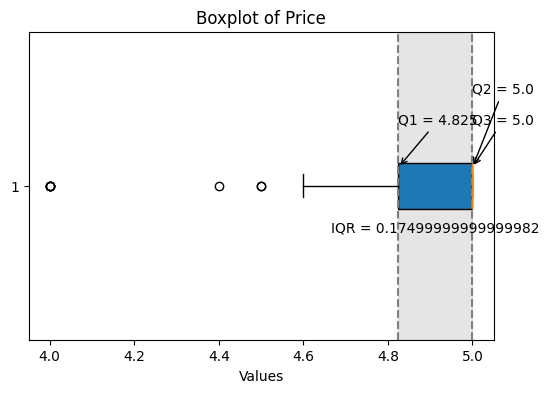

In [70]:
# Visualisasi boxplot menggunakan semua data

plt.figure(figsize=(6, 4))
plt.boxplot(df['rating'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Price')

plt.show()

Dari boxplot di atas dapat dikonfirmasi bahwa data rating banyak mengumpul di 4.8 hingga 5, dengan tail panjang di sebelah kiri. Hal tersebut mengindikasikan adanya negative skewness.

In [72]:
# Melihat normalitas data menggunakan D'Agostino's K^2 Test
res = stats.normaltest(df['rating'])

print(f'p-value: {res.pvalue}') 
print(f"Skewness: {df['rating'].skew()}")
print(f"Kurtosis: {df['rating'].kurtosis()}")


p-value: 4.942859580727235e-24
Skewness: -2.8527008081824983
Kurtosis: 8.796054135489127


Dari data di atas, dapat disimpulkan bahwa:
1. p-value > 0, hal ini menandakan bahwa persebaran data tidak normal
2. Skewness level < 1, hal ini menandakan bahwa skewness bersifat negatif dan memiliki tail yang panjang di sebelah kiri
3. Kurtosis > 3, hal ini menandakan bahwa kurtosis bersifat Leptokurtic dimana data cenderung terpusat pada satu nilai.

## Analisa Data Jumlah Produk Terjual

In [75]:
# Melihat data Median, Mean, dan Modus untuk Jumlah Terjual
print('Average Sold:',df['jumlah_terjual'].mean().round(2))
print('Median Sold:',df['jumlah_terjual'].median())
print('Mode Sold:',df['jumlah_terjual'].mode().values[0])
print("Min Sold:",df['jumlah_terjual'].min())
print("Max Sold:",df['jumlah_terjual'].max())

Average Sold: 57.69
Median Sold: 16.0
Mode Sold: 2.0
Min Sold: 1.0
Max Sold: 750.0


Dari hasil perhitungan sederhana di atas, dapat diprediksi bahwa persebaran data tidak normal karena mean > median. Kemungkinan besar ada data outlier pada kategori jumlah terjual.

In [76]:
# Melihat jumlah produk berdasarkan rating
df['jumlah_terjual'].value_counts().sort_index()

jumlah_terjual
1.0      11
2.0      14
3.0       7
4.0       4
5.0       4
6.0       2
7.0       6
8.0       5
9.0       6
10.0      2
11.0      2
12.0      2
14.0      3
15.0      4
16.0      3
19.0      3
20.0      1
22.0      3
27.0      1
28.0      3
29.0      1
30.0      6
40.0      6
50.0      9
60.0      5
70.0      1
80.0      7
90.0      2
100.0    12
250.0     5
500.0     5
750.0     1
Name: count, dtype: int64

In [85]:
# Melihat jarakan harga menggunakan standard deviasi
std = df['jumlah_terjual'].std()
print('Standard Deviation of Price:',std)

Standard Deviation of Price: 114.22214080125009


In [ ]:
Dari hasil di atas, dapat disimpulkan bahwa persebaran data jumlah terjual memiliki jarak yang cukup jauh, dengan nilai terjual terendah 1 dan tertinggi 750. Hal ini mengindikasikan adanya outlier yang cukup besar pada data jumlah terjual.

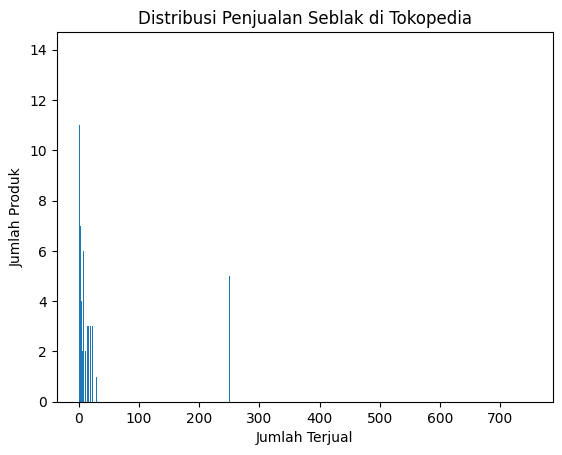

In [77]:
# Visualisasi persebaran data menggunakan histogram
df['jumlah_terjual'].plot(
    kind='hist',
    bins=1000, # Menggunakan bins yang lebih banyak untuk melihat distribusi data dengan lebih detail
)

plt.xlabel("Jumlah Terjual")
plt.ylabel("Jumlah Produk")
plt.title("Distribusi Penjualan Seblak di Tokopedia")

plt.show()


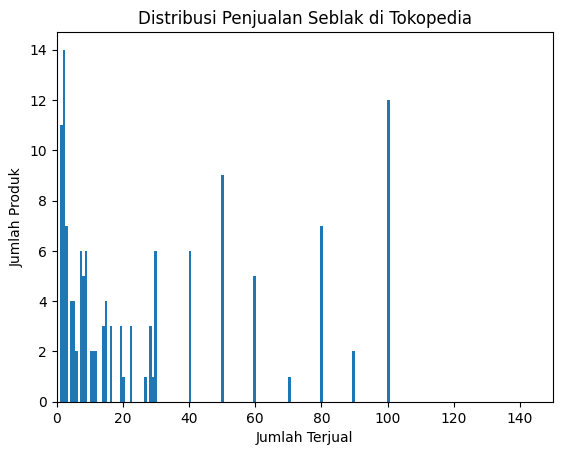

In [80]:
# Visualisasi persebaran data menggunakan histogram (excluding outlier)
df['jumlah_terjual'].plot(
    kind='hist',
    bins=1000, # Menggunakan bins yang lebih banyak untuk melihat distribusi data dengan lebih detail
)

plt.xlabel("Jumlah Terjual")
plt.ylabel("Jumlah Produk")
plt.title("Distribusi Penjualan Seblak di Tokopedia")

plt.xlim(0, 150)  # excluding outliers dengan membatasi jumlah terjual di 300
plt.show()


Setelah dilihat menggunakan histogram, tidak terlihat adanya skewness yang dominan. Data banyak terletak pada >20, 50, dan 100.

In [81]:
# Menghitung Q1, Q2, Q3, dan IQR untuk visualisasi boxplot
q1 = df['jumlah_terjual'].quantile(0.25)
q2 = df['jumlah_terjual'].quantile(0.5)
q3 = df['jumlah_terjual'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

Q1: 5.0
Q2: 16.0
Q3: 60.0
Interquartile Range (IQR): 55.0


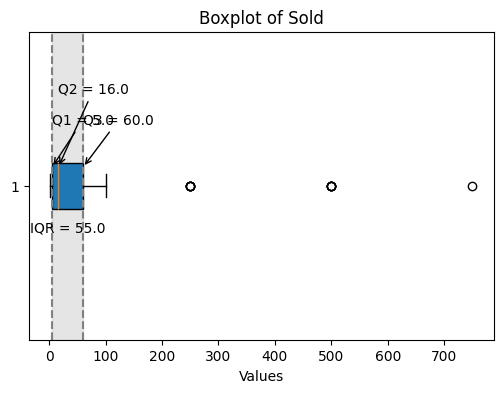

In [83]:
# Visualisasi boxplot menggunakan semua data

plt.figure(figsize=(6, 4))
plt.boxplot(df['jumlah_terjual'], vert=False, patch_artist=True)

plt.annotate(f'Q1 = {q1}', xy=(q1, 1.06), xytext=(q1, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q2 = {q2}', xy=(q2, 1.06), xytext=(q2, 1.3), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Q3 = {q3}', xy=(q3, 1.06), xytext=(q3, 1.2), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'IQR = {iqr}', xy=((q1+q3)/2, 0.85), ha='center')

plt.axvline(q1, linestyle='--', color='gray', label='Q1')
plt.axvline(q3, linestyle='--', color='gray', label='Q3')
plt.axvspan(q1, q3, alpha=0.2, color='gray', label='IQR')

plt.xlabel('Values')
plt.title('Boxplot of Sold')

plt.show()

Setelah dilihat menggunakan boxplot, dapat terlihat bahwa pola data memili tail yang panjang di sebelah kanan dan beberapa outliers di sebelah kanan.

In [120]:
# Melihat normalitas data menggunakan D'Agostino's K^2 Test
res = stats.normaltest(df['jumlah_terjual'])

print(f'p-value: {res.pvalue}') 
print(f"Skewness: {df['jumlah_terjual'].skew()}")
print(f"Kurtosis: {df['jumlah_terjual'].kurtosis()}")


p-value: 3.827780726958135e-31
Skewness: 3.7063516708505557
Kurtosis: 15.03361368382463


Dari data di atas, dapat disimpulkan bahwa:
1. Data tidak tersebar secara normal, karena p-value > 0.05
2. Skewness bersifat positive karena > 1 sehingga memiliki long tail disebelah kanan.
3. Kurtosis > 3 yang menandakan bahwa kurtosis bersifat Leptokurtic dimana data cenderung terpusat pada satu nilai.

## Kesimpulan

In [ ]:
Dari data yang ada di Tokopedia, dapat disimpulkan bahwa:
1. Harga seblak di Tokopedia sangat bervariasi, dengan median Rp.22.250 dan standard deviasi Rp.423.058, hal ini mengindikasikan adanya outlier yang cukup besar pada data harga seblak di Tokopedia.
2. Rating seblak di Tokopedia cenderung tinggi, dengan median 5.0 dan standard deviasi 0.36, hal ini mengindikasikan bahwa persebaran data rating sangat rapat di sekitar nilai 5.0.
3. Jumlah terjual seblak di Tokopedia sangat bervariasi, dengan median 16 dan standard deviasi 114,456, hal ini mengindikasikan adanya outlier yang cukup besar pada data jumlah terjual seblak di Tokopedia.

**Hasil Analisa Harga Seblak di Tokopedia**

Rata-rata harga setelah normalisasi/outlier dihapus
→ Rp 21.593 (ini representasi yang lebih mendekati “harga wajar” di pasar, karena sudah tidak terdistorsi oleh outlier ekstrem).

Median dari seluruh data
→ Rp 22.250 (median adalah harga tengah yang relatif stabil dan lebih robust terhadap outlier).


**Interpretasi**

Jika ingin mengikuti harga pasar (kompetitif) → kisaran Rp 21.500 – Rp 22.500 adalah titik optimal.

Harga di bawah itu → bisa meningkatkan peluang penjualan tapi berpotensi menekan margin.

Harga di atas itu → masih mungkin laku jika ada value tambah (misalnya packaging premium, promo ongkir, atau bundling).

Namun, kesimpulan ini masih terlalu general, kita belum melihat apakah ada perbedaan harga yang signifikan antar kota mengingat Samuel tinggal di kota Bandung. 

## Melakukan Analisa Korelasi antara Kota Penjual dan Harga

In [ ]:
# Pertama, kita lihat dulu distribusi data berdasarkan kota penjual
df['kota_penjual'].value_counts()

kota_penjual
Kab. Sumedang        22
Kab. Tasikmalaya     11
Tangerang Selatan    10
Bandung               9
Tangerang             9
Jakarta Selatan       8
Kab. Bandung          7
Jakarta Barat         6
Kab. Tegal            5
Jakarta Utara         5
Surabaya              5
Tasikmalaya           4
Bekasi                4
Jakarta Timur         4
Kab.Ciamis            3
Kab. Tangerang        3
Depok                 3
Kab. Pemalang         2
Kab. Sleman           2
Cimahi                2
Kediri                2
Kab. Boyolali         2
Madiun                1
Kab. Bekasi           1
Kab. Malang           1
Kab. Garut            1
Palembang             1
Kab. Bogor            1
Cirebon               1
Padang                1
Kab. Pangandaran      1
Bogor                 1
Kab. Gresik           1
Kab. Purworejo        1
Jakarta Pusat         1
Kab. Sidoarjo         1
Malang                1
Kab. Badung           1
Kab. Sukoharjo        1
Bandar Lampung        1
Name: count, dtype: int64

In [91]:
# Lalu, kita bisa melihat persebaran harga seblak berdasarkan kota penjual sebagai berikut:
df.groupby('kota_penjual')['harga_bersih'].agg(['min', 'max', 'mean', 'median', 'std']).sort_values(by='median')


,min,max,mean,median,std
kota_penjual,,,,,
Kediri,345,3500,1922.500000,1922.5,2.230922e+03
Padang,3150,3150,3150.000000,3150.0,NaN
Cirebon,3300,3300,3300.000000,3300.0,NaN
Madiun,3500,3500,3500.000000,3500.0,NaN
Kab. Sukoharjo,3500,3500,3500.000000,3500.0,NaN
Kab. Badung,3500,3500,3500.000000,3500.0,NaN
Kab. Gresik,3500,3500,3500.000000,3500.0,NaN
Depok,3500,40000,15666.666667,3500.0,2.107328e+04
Jakarta Utara,3600,14000,8720.000000,7500.0,4.802812e+03


In [ ]:
# Mengumpulkan data berdasarkan provinsi untuk uji ANOVA

jawa_barat = df['harga_bersih'][
    (df['kota_penjual']=='Bekasi') |
    (df['kota_penjual']=='Depok') |
    (df['kota_penjual']=='Kab. Bandung') |
    (df['kota_penjual']=='Bandung') |
    (df['kota_penjual']=='Kab.Ciamis') |
    (df['kota_penjual']=='Kab. Tasikmalaya') |
    (df['kota_penjual']=='Tasikmalaya') |
    (df['kota_penjual']=='Kab. Sumedang') |
    (df['kota_penjual']=='Cimahi') |
    (df['kota_penjual']=='Bogor') |
    (df['kota_penjual']=='Kab. Pangandaran') |
    (df['kota_penjual']=='Cirebon') |
    (df['kota_penjual']=='Kab. Bogor') |
    (df['kota_penjual']=='Kab. Garut') |
    (df['kota_penjual']=='Kab. Bekasi')
]

jawa_timur = df['harga_bersih'][
    (df['kota_penjual']=='Surabaya') |
    (df['kota_penjual']=='Kediri') |
    (df['kota_penjual']=='Madiun') |
    (df['kota_penjual']=='Malang') |
    (df['kota_penjual']=='Kab. Gresik') |
    (df['kota_penjual']=='Kab. Sidoarjo') |
    (df['kota_penjual']=='Kab. Malang')
]


jawa_tengah = df['harga_bersih'][
    (df['kota_penjual']=='Kab. Sukoharjo') |
    (df['kota_penjual']=='Kab. Boyolali') |
    (df['kota_penjual']=='Kab. Purworejo') |
    (df['kota_penjual']=='Kab. Tegal') |
    (df['kota_penjual']=='Kab. Pemalang')
]


dki_jakarta = df['harga_bersih'][
    (df['kota_penjual']=='Jakarta Timur') |
    (df['kota_penjual']=='Jakarta Pusat') |
    (df['kota_penjual']=='Jakarta Selatan') |
    (df['kota_penjual']=='Jakarta Utara') |
    (df['kota_penjual']=='Jakarta Barat')
]

banten = df['harga_bersih'][
    (df['kota_penjual']=='Tangerang') |
    (df['kota_penjual']=='Kab. Tangerang') |
    (df['kota_penjual']=='Tangerang Selatan')
]

sumatera_barat   = df['harga_bersih'][df['kota_penjual']=='Padang']
bali             = df['harga_bersih'][df['kota_penjual']=='Kab. Badung']
sumatera_selatan = df['harga_bersih'][df['kota_penjual']=='Palembang']
diy              = df['harga_bersih'][df['kota_penjual']=='Kab. Sleman']
lampung          = df['harga_bersih'][df['kota_penjual']=='Bandar Lampung']


In [100]:
kota_to_prov = {
    # Jawa Barat
    'Bekasi':'Jawa Barat','Depok':'Jawa Barat','Kab. Bandung':'Jawa Barat',
    'Bandung':'Jawa Barat','Kab.Ciamis':'Jawa Barat','Kab. Tasikmalaya':'Jawa Barat',
    'Tasikmalaya':'Jawa Barat','Kab. Sumedang':'Jawa Barat','Cimahi':'Jawa Barat',
    'Bogor':'Jawa Barat','Kab. Pangandaran':'Jawa Barat','Cirebon':'Jawa Barat',
    'Kab. Bogor':'Jawa Barat','Kab. Garut':'Jawa Barat','Kab. Bekasi':'Jawa Barat',

    # Jawa Timur
    'Surabaya':'Jawa Timur','Kediri':'Jawa Timur','Madiun':'Jawa Timur',
    'Malang':'Jawa Timur','Kab. Gresik':'Jawa Timur','Kab. Sidoarjo':'Jawa Timur',
    'Kab. Malang':'Jawa Timur',

    # Jawa Tengah
    'Kab. Sukoharjo':'Jawa Tengah','Kab. Boyolali':'Jawa Tengah',
    'Kab. Purworejo':'Jawa Tengah','Kab. Tegal':'Jawa Tengah','Kab. Pemalang':'Jawa Tengah',

    # DKI Jakarta
    'Jakarta Timur':'DKI Jakarta','Jakarta Pusat':'DKI Jakarta',
    'Jakarta Selatan':'DKI Jakarta','Jakarta Utara':'DKI Jakarta',
    'Jakarta Barat':'DKI Jakarta',

    # Banten
    'Tangerang':'Banten','Kab. Tangerang':'Banten','Tangerang Selatan':'Banten',

    # Lain-lain
    'Padang':'Sumatera Barat','Kab. Badung':'Bali','Palembang':'Sumatera Selatan',
    'Kab. Sleman':'DI Yogyakarta','Bandar Lampung':'Lampung'
}
df['provinsi'] = df['kota_penjual'].map(kota_to_prov)


In [101]:
provinsi = jawa_barat, jawa_timur, jawa_tengah, dki_jakarta, banten, sumatera_barat, bali, sumatera_selatan, diy, lampung

# Lalu, kita bisa melihat persebaran harga seblak berdasarkan provinsi penjual sebagai berikut:
df.groupby('provinsi')['harga_bersih'].agg(
    ['count', 'min', 'max', 'mean', 'median', 'std']
).sort_values(by='median')


,count,min,max,mean,median,std
provinsi,,,,,,
Sumatera Barat,1,3150,3150,3150.000000,3150.0,NaN
Bali,1,3500,3500,3500.000000,3500.0,NaN
Lampung,1,9999,9999,9999.000000,9999.0,NaN
Jawa Timur,12,345,58900,17568.583333,11734.0,1.835466e+04
Banten,22,2900,194000,28457.409091,12819.5,4.456334e+04
DKI Jakarta,24,3500,5000000,230224.958333,17000.0,1.016308e+06
Jawa Barat,71,350,140777,29239.732394,25000.0,2.146526e+04
Sumatera Selatan,1,34900,34900,34900.000000,34900.0,NaN
DI Yogyakarta,2,2000,85000,43500.000000,43500.0,5.868986e+04


Dugaan Hasan adalah adanya perbedaan harga yang signifikan antara Provinsi dan Harga, namun Hasan belum yakin terkait dengan arah perbedaannya. Maka dengan itu Hasan menggunakan two-tailed hypothesis.

H0 = Tidak adanya perbedaan harga yang signifikan antara Provinsi dan Harga
H1 = Adanya perbedaan harga yang signifikan antara Provinsi dan Harga.

Dalam analisa ini Hasan berusaha untuk membantah H0.

In [ ]:
# Melakukan uji ANOVA satu arah (One-Way ANOVA) untuk melihat apakah ada perbedaan harga seblak yang signifikan berdasarkan provinsi penjual
res = stats.f_oneway(jawa_barat, jawa_timur, jawa_tengah, dki_jakarta, banten, sumatera_barat, bali, sumatera_selatan, diy, lampung)
print('P-value:',res.pvalue)

P-value: 0.6238881531619682


Berdasarkan hasil uji ANOVA, diperoleh p-value > 0.05, sehingga H0 gagal ditolak. Hal ini menunjukkan bahwa tidak terdapat perbedaan harga yang signifikan antar provinsi. Dengan demikian, faktor wilayah penjual tidak memengaruhi variasi harga seblak di Tokopedia.

Kesimpulan ini memperkuat analisis deskriptif sebelumnya, sehingga Samuel dapat menetapkan strategi harga yang kompetitif di kisaran Rp21.500–Rp22.500. Rentang harga ini cukup optimal untuk bersaing di pasar tanpa perlu menyesuaikan harga berdasarkan lokasi penjual.

In [ ]:
Setelah mendapatkan perkiraan harga penjualan yang optimal di Tokopedia, Samuel ingin mengetahui berapa perkiraan pendapatan minimum dan maksimum yang bisa didapatkan jika ia menjadi dropshipper seblak di Tokopedia. Untuk itu, Hasan melakukan analisa terhadap data penjualan seblak di Tokopedia.

## Melakukan Analisa Confidence Interval untuk Harga Seblak di Tokopedia

In [112]:
# Hitung total penjualan per transaksi
df['total_penjualan'] = df['harga_bersih'] * df['jumlah_terjual']

# Hitung total keuntungan per produk
pendapatan = df.groupby('nama_produk')['total_penjualan'].sum().sort_values(ascending=False)

print(pendapatan.head())

nama_produk
makaroni cikruh/seblak cikruh                                                                                                          15000000.0
Hiasan Dinding warung seblak/Hiasan Dinding ruang makan/Hiasan Dinding aesthetic/Hiasan Dinding ruangan/Hiasan dinding tema seblak/    13500000.0
[Eksklusif] MIX KERUPUK SEBLAK KERING - SAJODO SNACK & FOOD (250gr & 500gr) (Pilih Opsi)                                               11419500.0
Mangkok Plastik Besar 50pcs Mangkuk Bakso Mi Mie Ayam Seblak                                                                           11125000.0
Kartika Sari - Seblak Koin                                                                                                             10000000.0
Name: total_penjualan, dtype: float64


In [114]:
# Setelah menghitung keuntungan per transaksi, kita bisa melihat rata-rata, minimum, dan maksimum keuntungan yang bisa didapatkan sebagai berikut:
print('Average =',df['total_penjualan'].mean().round(2))
print('Minimum =',df['total_penjualan'].min())
print('Maximum =',df['total_penjualan'].max())

Average = 1349752.51
Minimum = 14000.0
Maximum = 15000000.0


Berdasarkan hasil analisis, diketahui bahwa rata-rata penjualan seblak mencapai Rp 1.349.752, dengan penjualan minimum sebesar Rp 14.000 dan penjualan maksimum hingga Rp 15.000.000. Angka ini menunjukkan adanya variasi penjualan yang cukup tinggi antar produk.

Untuk mendapatkan perkiraan yang lebih andal mengenai total penjualan, Samuel kemudian menghitung Confidence Interval (CI) 95%. Melalui pendekatan ini, ia dapat menentukan batas bawah dan batas atas rata-rata penjualan, sehingga memperoleh gambaran yang lebih akurat tentang rentang nilai penjualan seblak di Tokopedia.

In [115]:
# Melakukan perhitungan Confidence Interval 95% untuk mengetahui batas atas dan batas bawah total penjualan seblak.
std = df['keuntungan'].std() # Mencari standard deviasi
N = len(df)
low, up = stats.norm.interval(0.95,loc=df['keuntungan'].mean(),scale=std/np.sqrt(N)) # Mencari confidence interval 95%
print('Lower Limit:',low.round(2))
print('Upper Limit:',up.round(2))

Lower Limit: 927114.25
Upper Limit: 1772390.78


In [ ]:
Berdasarkan hasil perhitungan, diperoleh bahwa batas bawah penjualan adalah sebesar Rp 927.114, sedangkan batas atas penjualan mencapai Rp 1.772.390. Rentang ini menggambarkan estimasi penjualan seblak dengan tingkat keyakinan 95%.

## Analisa Korelasi Antara Harga dan Jumlah Pembelian

In [ ]:
Namun, sebelum menetapkan margin yang akan digunakan, Samuel perlu mempertimbangkan apakah harga jual yang lebih murah akan lebih disukai oleh konsumen.

Disukai disini artinya, apakah konsumen akan membeli kembali produk seblak tersebut di kemudian hari. Untuk itu, untuk mengukur rasa suka konsumen, data jumlah terjual dapat dijadikan sebagai indikator.

In [ ]:
# Spearman correlation antara dua kolom
corr_spearman = df['harga_bersih'].corr(df['jumlah_terjual'], method='spearman') # Spearman digunakan karena data tidak terdistribusi normal
print("Spearman correlation:", corr_spearman)


Spearman correlation: -0.24569006505759988


Berdasarkan hasil analisis, diperoleh nilai Spearman correlation = –0.245, yang menunjukkan adanya korelasi negatif lemah antara harga dan jumlah terjual. Hal ini mengindikasikan bahwa ketika harga meningkat, jumlah pembelian cenderung menurun, namun hubungan tersebut tidak kuat. Dengan demikian, harga bukanlah satu-satunya faktor penentu penjualan, sehingga aspek lain seperti kualitas produk, ulasan pelanggan, dan strategi promosi juga berperan penting dalam memengaruhi jumlah pembelian.

## Kesimpulan Utama

Berdasarkan hasil analisis penjualan seblak di Tokopedia, dapat disimpulkan bahwa harga produk sangat bervariasi dan dipengaruhi oleh outlier, sehingga rata-rata awal kurang representatif. Median sebesar Rp22.250 dan rata-rata setelah normalisasi sebesar Rp21.593 lebih tepat dijadikan acuan harga pasar. 

Uji ANOVA menunjukkan tidak ada perbedaan harga signifikan antar provinsi, sehingga faktor lokasi penjual tidak memengaruhi harga. Estimasi penjualan dengan Confidence Interval 95% menempatkan rata-rata penjualan pada rentang Rp927.114 hingga Rp1.772.390, memberikan gambaran lebih akurat mengenai potensi penjualan. 

Sementara itu, hasil korelasi Spearman sebesar –0,245 mengindikasikan adanya hubungan negatif yang lemah antara harga dan jumlah terjual, artinya harga yang lebih tinggi cenderung menurunkan penjualan, tetapi bukan faktor utama yang menentukan. 

Dengan demikian, strategi penetapan harga optimal berada pada kisaran Rp21.500–Rp22.500, yang selaras dengan pasar, sementara faktor lain seperti kualitas produk, ulasan pembeli, promosi, dan ongkos kirim memiliki peran lebih besar dalam memengaruhi tingkat penjualan.

### Perkiraan Total Pendapatan Samuel

In [118]:
# Hitung total pendapatan Samuel jika menjadi dropshipper seblak di Tokopedia
pendapatan_samuel = 22250 * 50 # Menggunakan harga median sebagai harga jual dan perkiraan terjual 50 produk per bulan
print('Pendapatan Samuel per bulan jika menjadi dropshipper seblak di Tokopedia adalah Rp.',pendapatan_samuel)

Pendapatan Samuel per bulan jika menjadi dropshipper seblak di Tokopedia adalah Rp. 1112500
